+----------------------------------------------+
|                  Input Data                  |
+---+--------+--------+------------+-----------+
| i |   x    |   y    |     x²     |     xy    |
+---+--------+--------+------------+-----------+
| 1 | 649.0  | 26.05  |  421201.0  |  16906.45 |
| 2 | 665.0  | 30.05  |  442225.0  |  19983.25 |
| 3 | 684.8  | 28.91  | 468951.04  | 19797.568 |
| 4 | 713.0  | 31.22  |  508369.0  |  22259.86 |
| Σ | 2711.8 | 116.23 | 1840746.04 | 78947.128 |
+---+--------+--------+------------+-----------+ 

+--------------------------------------------+
|      Fit Results & Statistical Errors      |
+------------------+-----------+-------------+
|    Parameter     |   Value   | Uncertainty |
+------------------+-----------+-------------+
|    Slope (a₁)    |   0.0653  |   ±0.0331   |
|  Intercept (a₀)  |  -15.2231 |   ±22.4487  |
| σ_y (Std. Error) |   1.5806  |             |
|    Δ (delta)     | 9124.9200 |             |
+------------------+-----------+----

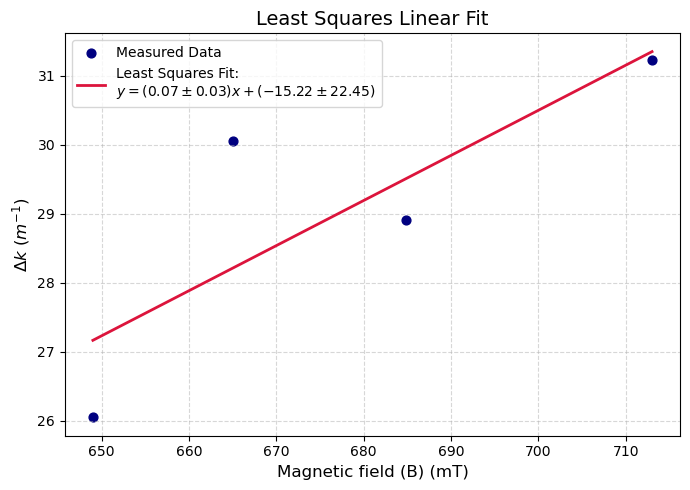

In [5]:
# Least Squares Linear Fit with Statistical Error Tables (Taylor's Method)
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import csv

# --- Input Data (Generalized) ---
# Replace these with your actual data
x = np.array([649,665,684.8,713], dtype=float)
y = np.array([26.05,30.05,28.91,31.22], dtype=float)
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis (Taylor's Book) ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Save Input Data Table as CSV ---
with open("InputData.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(table_data.field_names)
    for row in table_data._rows:
        writer.writerow(row)

# --- Save Results Table as CSV ---
with open("FitResults.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(results.field_names)
    for row in results._rows:
        writer.writerow(row)

# --- Save Fitted Values Table as CSV ---
with open("FittedValues.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(fit_table.field_names)
    for row in fit_table._rows:
        writer.writerow(row)

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.2f} \pm {sigma_a1:.2f})x + ({a0:.2f} \pm {sigma_a0:.2f})$')
plt.xlabel("Magnetic field (B) (mT)", fontsize=12)
plt.ylabel("$\Delta k$ ($ m^{-1})$", fontsize=12)
plt.title("Least Squares Linear Fit", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

+---------------------------+
|   Extrapolated B Values   |
+--------+------------------+
| d (mm) | B (extrapolated) |
+--------+------------------+
|  39.9  |      683.0       |
|  39.6  |      708.5       |
|  39.4  |      725.5       |
+--------+------------------+


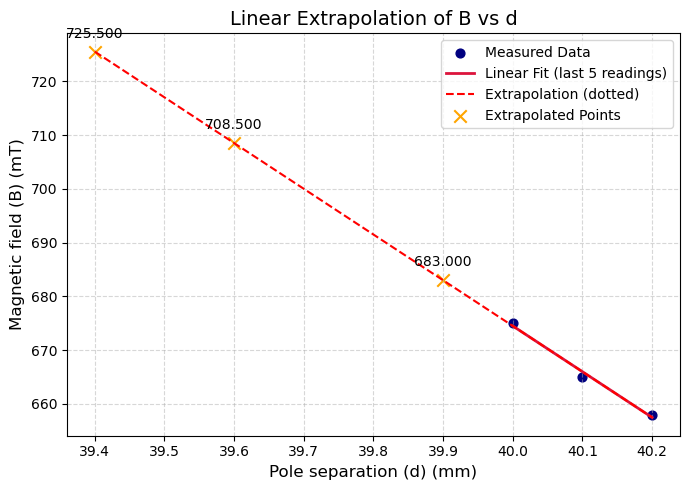

In [ ]:
# Linear Extrapolation for Last 4-5 Readings of B vs d
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# --- Example Data: Replace with your actual B vs d values ---
# d in mm, B in arbitrary units (e.g., Mili Tesla)
d = np.array([40, 40.1, 40.2 ])  # Only readings above 40mm
B = np.array([675, 665, 658 ])

# --- Linear Fit for Extrapolation ---
coeffs = np.polyfit(d, B, 1)  # Linear fit (degree 1)
slope, intercept = coeffs

# --- Extrapolate B for desired d values ---
d_extrap = np.array([39.9, 39.6, 39.4])
B_extrap = slope * d_extrap + intercept

# --- Table of Extrapolated Values ---
extrap_table = PrettyTable(["d (mm)", "B (extrapolated)"])
extrap_table.title = "Extrapolated B Values"
for di, Bi in zip(d_extrap, B_extrap):
    extrap_table.add_row([round(di, 2), round(Bi, 4)])
print(extrap_table)

# Dotted extrapolation line
d_full = np.concatenate([d, d_extrap])
d_full_sorted = np.sort(d_full)
B_full = slope * d_full_sorted + intercept

# --- Plot ---
plt.figure(figsize=(7,5))
plt.scatter(d, B, color='navy', label='Measured Data', s=40)
plt.plot(d, slope*d + intercept, color='crimson', linewidth=2, label='Linear Fit (last 5 readings)')
plt.plot(d_full_sorted, B_full, 'r--', linewidth=1.5, label='Extrapolation (dotted)')
plt.scatter(d_extrap, B_extrap, color='orange', marker='x', s=80, label='Extrapolated Points')
for xi, yi in zip(d_extrap, B_extrap):
    plt.annotate(f"{yi:.3f}", (xi, yi), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
plt.xlabel("Pole separation (d) (mm)", fontsize=12)
plt.ylabel("Magnetic field (B) (mT)", fontsize=12)
plt.title("Linear Extrapolation of B vs d", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()